In [1]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used


In [2]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
Y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


In [27]:
print("X_train shape [0]", X_train.shape[0])
print("y_train shape [0]", Y_train.shape[0])
print("X_test shape [0]", X_test.shape[0])
print("y_test shape [0]", Y_test.shape[0])
print("X_train type", type(X_train))
print("y_train type ", type(Y_train))
print("X_test type", type(X_test))
print("y_test type", type(Y_test))
print("X_train.shape type", type(X_train.shape))
print("y_train.shape type ", type(Y_train.shape))

X_train shape [0] 60000
y_train shape [0] 60000
X_test shape [0] 10000
y_test shape [0] 10000
X_train type <class 'numpy.ndarray'>
y_train type  <class 'numpy.ndarray'>
X_test type <class 'numpy.ndarray'>
y_test type <class 'numpy.ndarray'>
X_train.shape type <class 'tuple'>
y_train.shape type  <class 'tuple'>


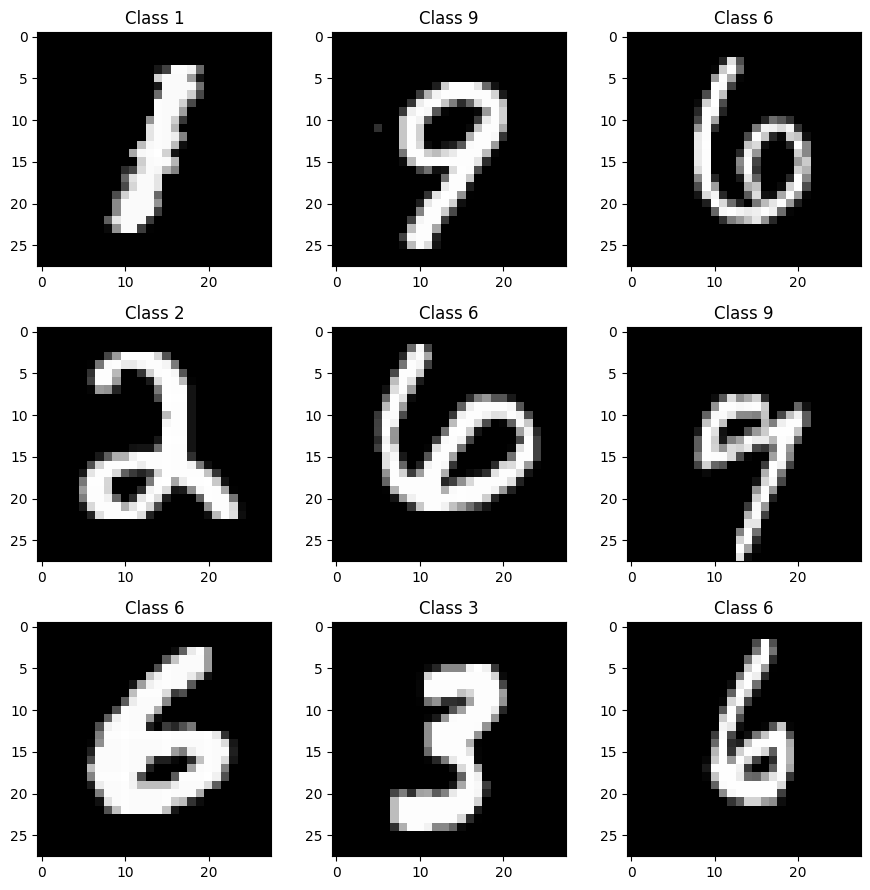

In [13]:
from re import X
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[num]))

plt.tight_layout()

x_train shape  (12665, 28, 28)
y_train shape  (12665,)
x_test shape  (2115, 28, 28)
y_test shape  (2115,)


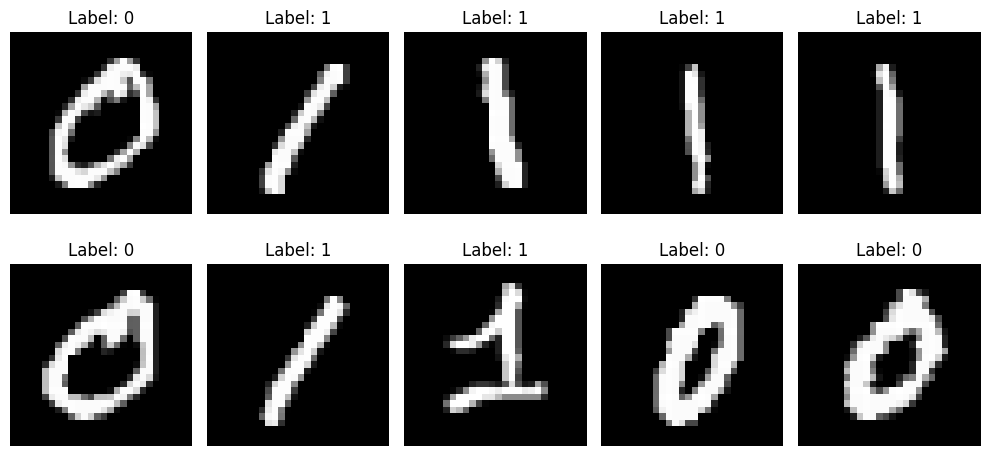

In [3]:
# Filter the data to include only classes 0 and 1
x_train = X_train[(Y_train == 0) | (Y_train == 1)]
y_train = Y_train[(Y_train == 0) | (Y_train == 1)]
x_test = X_test[(Y_test == 0) | (Y_test == 1)]
y_test = Y_test[(Y_test == 0) | (Y_test == 1)]
print("x_train shape ", x_train.shape)
print("y_train shape ", y_train.shape)
print("x_test shape ", x_test.shape)
print("y_test shape ", y_test.shape)

# Function to plot images
def plot_images(images, labels, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Display some filtered images
plot_images(x_train, y_train)

In [4]:
# Flatten the images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)
print(x_test.shape)

(12665, 784)
(2115, 784)


In [5]:
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape)
print(x_test.shape)
# Add a bias term to the input data
x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
x_test = np.hstack([np.ones((x_test.shape[0], 1)), x_test])
print(x_train.shape)
print(x_test.shape)
# Convert labels to 0 and 1
y_train = (y_train == 1).astype(int)
y_test = (y_test == 1).astype(int)
print("shape np.ones:",np.ones((x_train.shape[0], 1)).shape)

(12665, 784)
(2115, 784)
(12665, 785)
(2115, 785)
shape np.ones: (12665, 1)


In [14]:
print("lenght:", len(x_train))
print("shape:", x_train.shape)
print("lenght:", len(y_train))
print("shape:", y_train.shape)

lenght: 12665
shape: (12665, 785)
lenght: 12665
shape: (12665,)


# X @ theta == np.dot(X, theta)

In [21]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    hypothesis = sigmoid(X @ theta)
    cost = (-1 / m) * (y.T @ np.log(hypothesis) + (1 - y).T @ np.log(1 - hypothesis))
    return cost

# Gradient function
def compute_gradient(X, y, theta):
    m = len(y)
    hypothesis = sigmoid(X @ theta)
    gradient = (1 / m) * (X.T @ (hypothesis - y))
    return gradient

# Gradient descent function
def gradient_descent(X, y, theta, alpha, num_iterations):
    cost_history = []
    for i in range(num_iterations):
        gradient = compute_gradient(X, y, theta)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

In [24]:
# Initialize parameters
theta = np.zeros(x_train.shape[1])
alpha = 0.1
num_iterations = 1000

# Train the model
theta, cost_history = gradient_descent(x_train, y_train, theta, alpha, num_iterations)

In [25]:
print(  "theta shape:", theta.shape)
print("theta:", theta)
print("cost_history shape:", len(cost_history))
print("cost_history:", cost_history)

theta shape: (785,)
theta: [ 2.51258526e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.50414294e-04 -2.97303253e-04 -1.22211614e-04  3.40752191e-04
 -9.49990836e-04 -3.97490390e-03 -1.92617208e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [15]:
# Predict function
def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

# Compute accuracy
def compute_accuracy(X, y, theta):
    predictions = predict(X, theta)
    accuracy = np.mean(predictions == y) * 100
    return accuracy

# Show the accuracy

Training Accuracy: 99.85%
Testing Accuracy: 99.95%


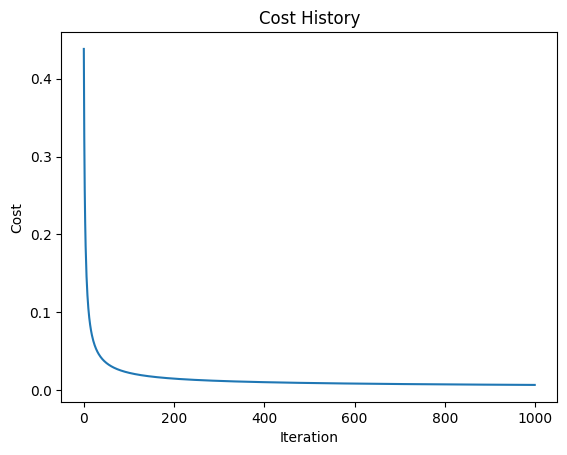

In [26]:
# Calculate accuracies
train_accuracy = compute_accuracy(x_train, y_train, theta)
test_accuracy = compute_accuracy(x_test, y_test, theta)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")

# Plot cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()